In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
data=pd.read_csv("nv.csv")

In [3]:
data

,outlook,temp,Humidity,Wind,Play_Tennis
0,Sunny,hot,high,weak,no
1,Sunny,hot,high,strong,no
2,overcast,hot,high,weak,yes
3,Rain,mild,high,weak,yes
4,Rain,cool,normal,weak,yes
5,Rain,cool,normal,strong,no
6,overcast,cool,normal,strong,yes
7,Sunny,mild,high,weak,no
8,Sunny,cool,normal,weak,yes
9,Rain,mild,normal,weak,yes


In [4]:
data.shape

(14, 5)

In [5]:
encode=LabelEncoder()
data['Play_Tennis']=encode.fit_transform(data.Play_Tennis)

In [6]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [7]:
main=x.columns
main

Index(['outlook', 'temp', 'Humidity', 'Wind'], dtype='object')

In [8]:
x=pd.get_dummies(x)
x

,outlook_Rain,outlook_Sunny,outlook_overcast,temp_cool,temp_hot,temp_mild,Humidity_high,Humidity_normal,Wind_strong,Wind_weak
0,0,1,0,0,1,0,1,0,0,1
1,0,1,0,0,1,0,1,0,1,0
2,0,0,1,0,1,0,1,0,0,1
3,1,0,0,0,0,1,1,0,0,1
4,1,0,0,1,0,0,0,1,0,1
5,1,0,0,1,0,0,0,1,1,0
6,0,0,1,1,0,0,0,1,1,0
7,0,1,0,0,0,1,1,0,0,1
8,0,1,0,1,0,0,0,1,0,1
9,1,0,0,0,0,1,0,1,0,1


In [9]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: Play_Tennis, dtype: int32

In [10]:
"""from sklearn import preprocessing
string_to_int= preprocessing.LabelEncoder()"""

'from sklearn import preprocessing\nstring_to_int= preprocessing.LabelEncoder()'

In [11]:
"""data=data.apply(string_to_int.fit_transform)
data"""

'data=data.apply(string_to_int.fit_transform)\ndata'

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [13]:
classifier=DecisionTreeClassifier(criterion = "entropy")

In [14]:
classifier.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [15]:
y_pred=classifier.predict(x_test)

In [16]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [17]:
data_p=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})  
data_p

,Actual,Predicted
13,0,0
3,1,1
1,0,0
6,1,1
7,0,0


In [18]:
value=x.columns
value

Index(['outlook_Rain', 'outlook_Sunny', 'outlook_overcast', 'temp_cool',
       'temp_hot', 'temp_mild', 'Humidity_high', 'Humidity_normal',
       'Wind_strong', 'Wind_weak'],
      dtype='object')

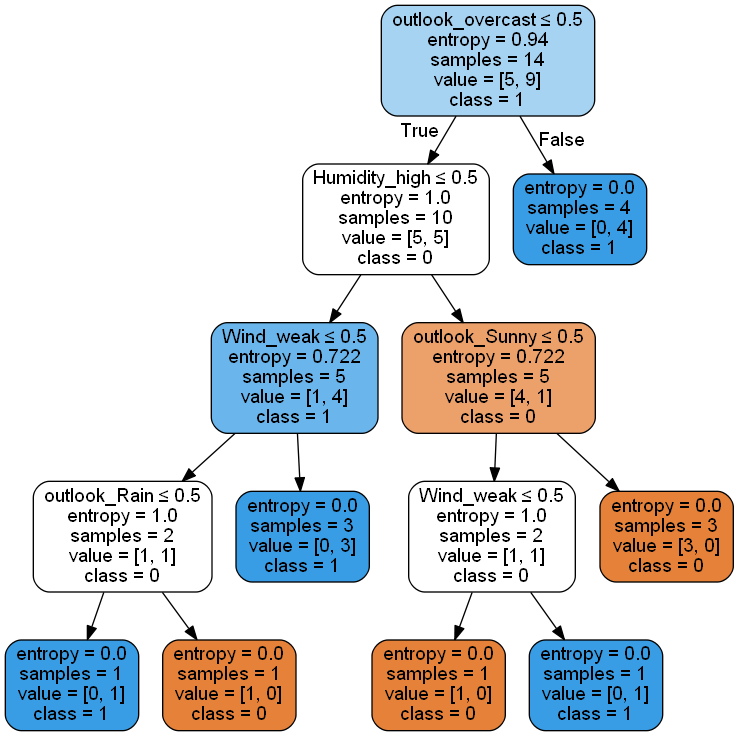

In [21]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,
filled=True, rounded=True,
special_characters=True,feature_names =value,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Play Tennis.png')
Image(graph.create_png())

In [ ]:
"""from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    export_graphviz(clf, out_file=dot_data,  
                         feature_names=value,  
                         class_names=value,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())"""

In [ ]:
"""plot_decision_tree(classifier, x_train.columns,data.columns[1])"""